In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
34,288 cases (7 day average) as of Fri 19 Nov, +275.1 since Thu 18 Nov
662 hospitalised (7 day average) as of Mon 22 Nov, -13.3 since Sun 21 Nov
105 died (7 day average) as of Fri 19 Nov, -1.1 since Thu 18 Nov


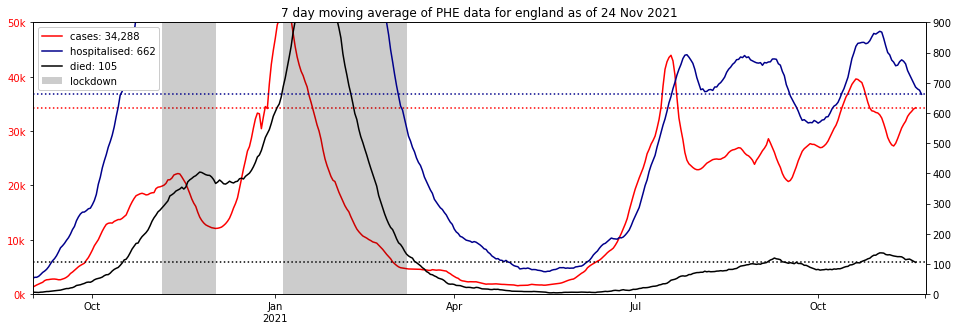

In [3]:
plot_summary(earliest_date='2020-09-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=50_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=900)

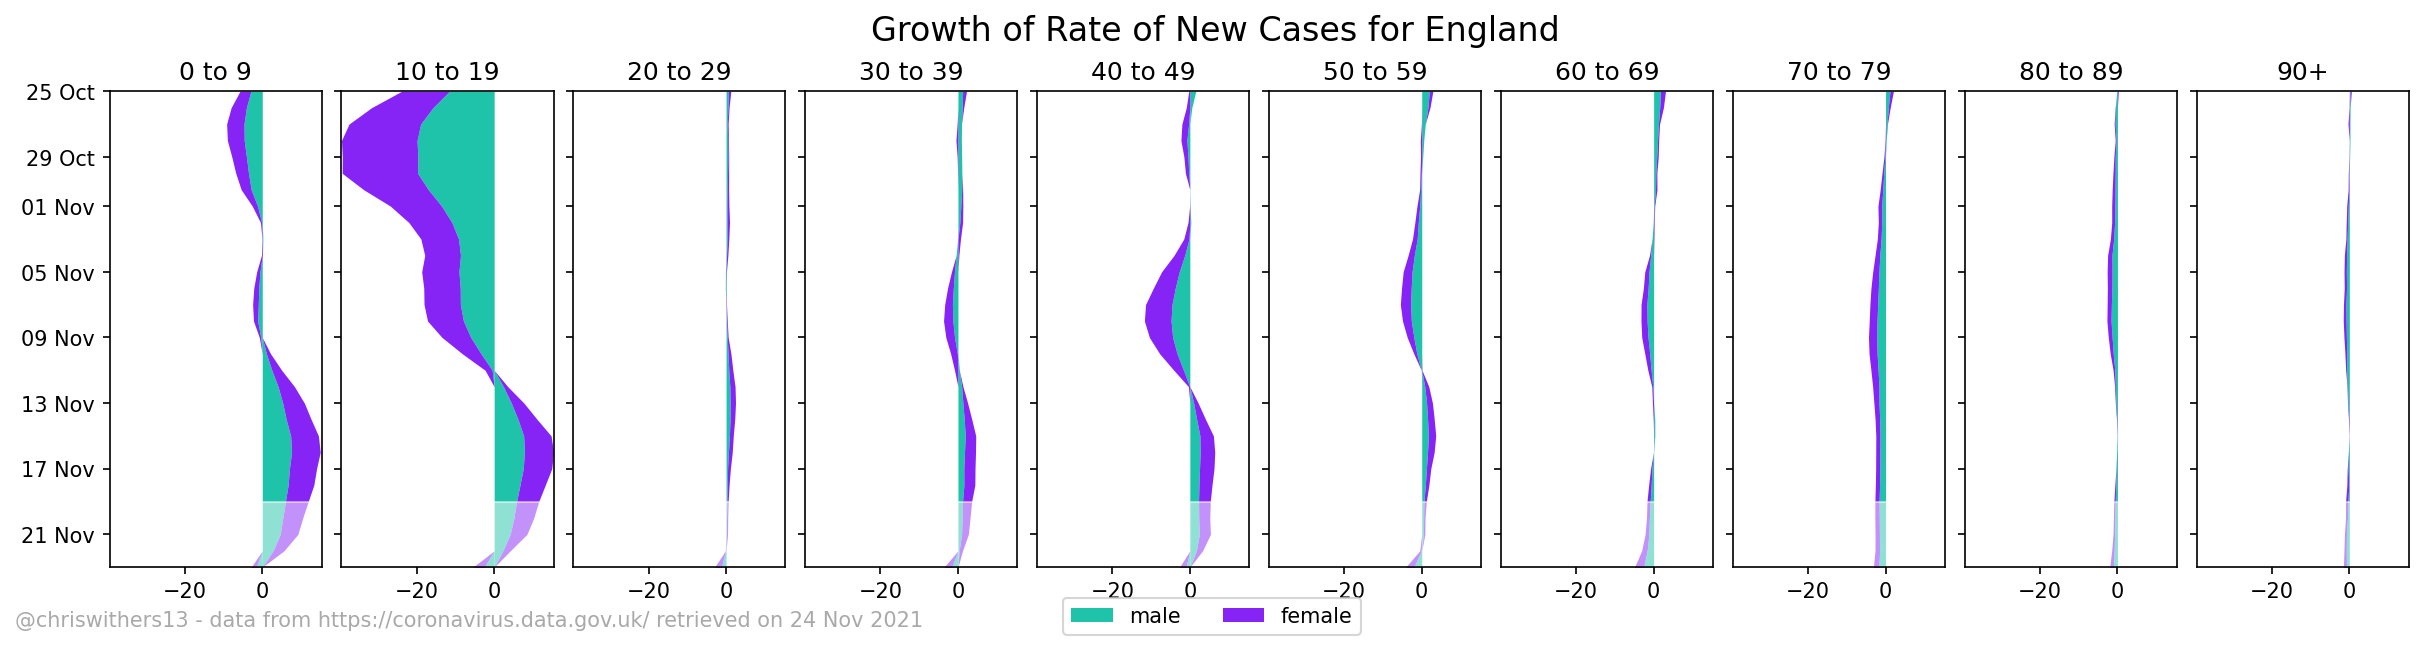

In [4]:
demographic_stream_plot('Growth of Rate of New Cases', order=2, figsize=(16, 4))

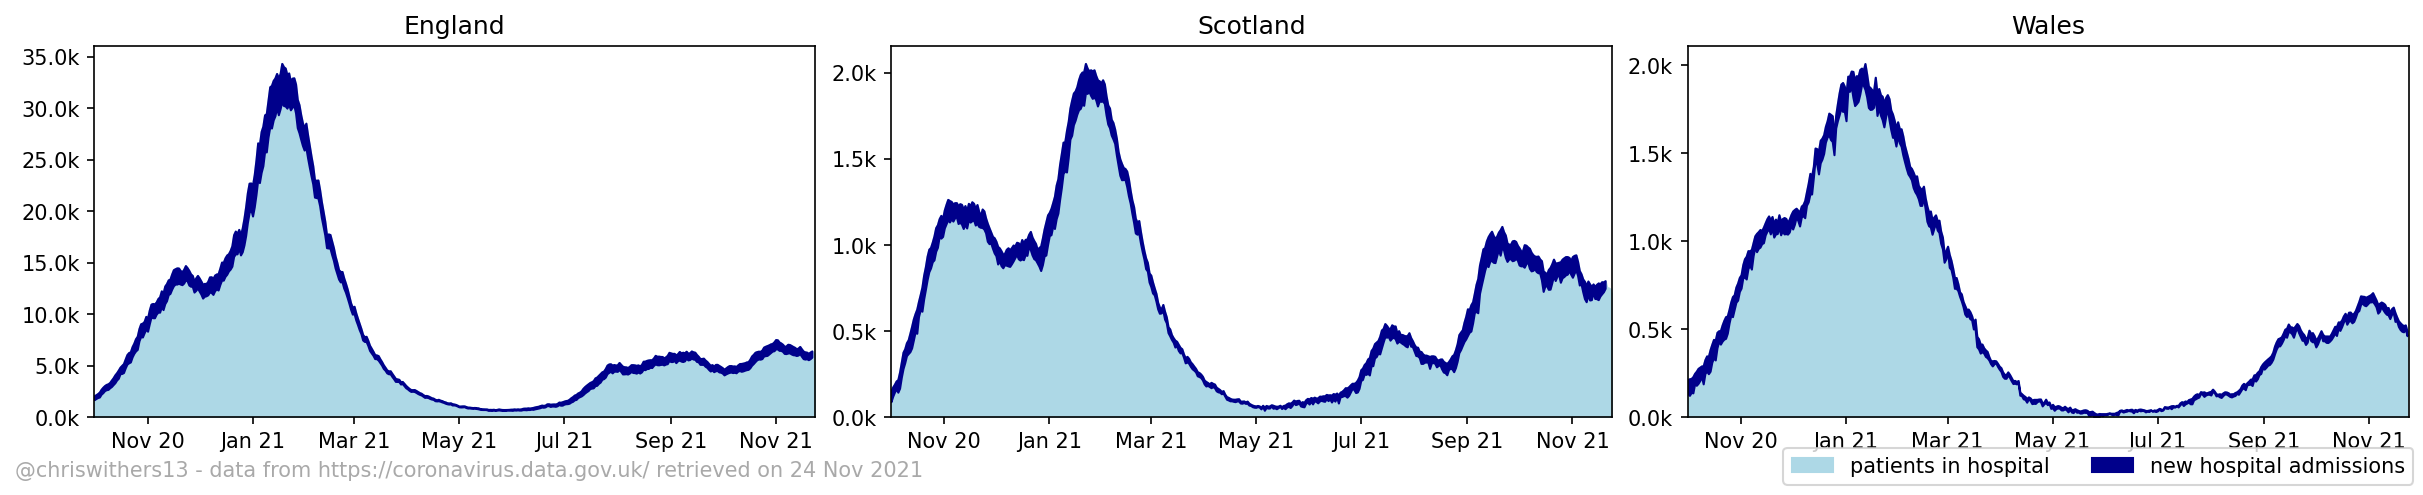

In [5]:
hospital_plot(start='2020-10', figsize=(16,3), figs=(1, 3))

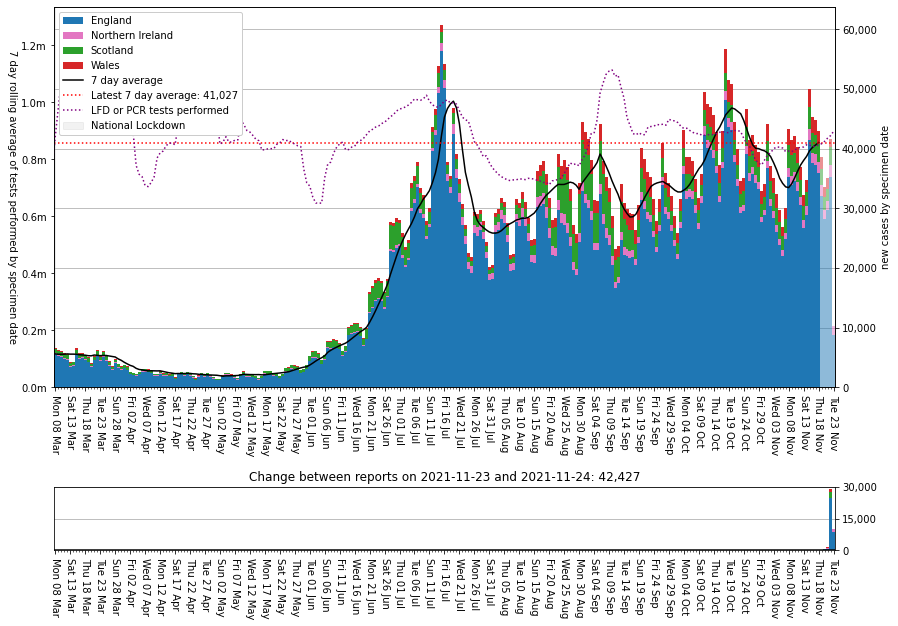

In [6]:
plot_areas(for_date, 'cases_nations', date_format='%a %d %b')

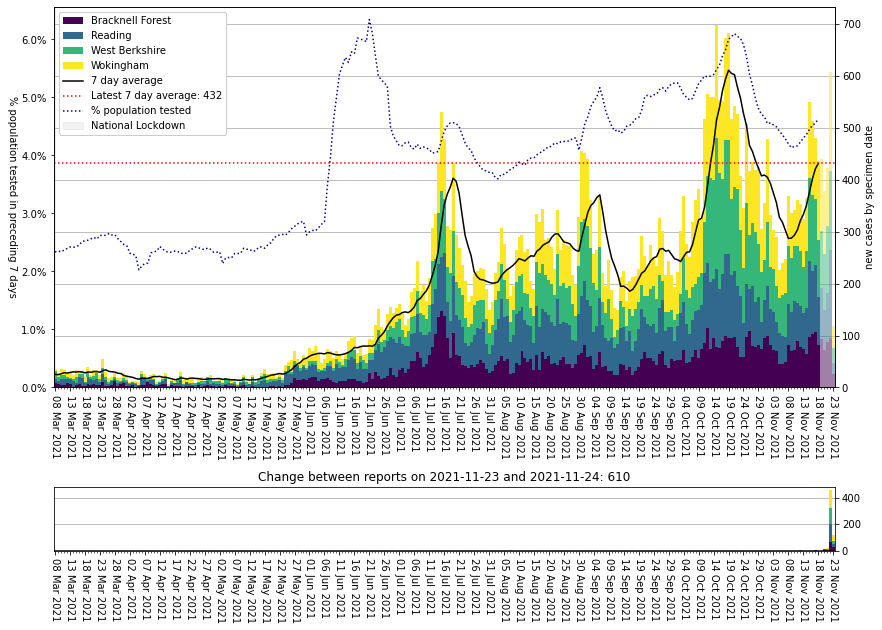

In [7]:
plot_areas(for_date, areas=my_areas, lines=unique_people_tested)

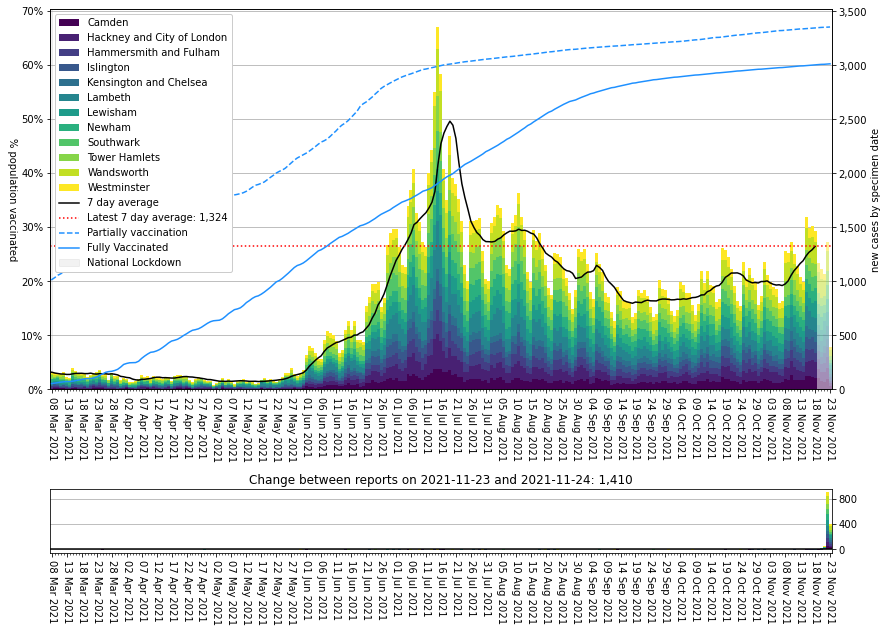

In [8]:
plot_areas(for_date, areas=london_areas, lines=population_vaccinated)

In [9]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [10]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                  
E07000046                  Torridge          921.382220   
E07000043               North Devon          798.805909   
N09000009                Mid Ulster          792.443176   
N09000008       Mid and East Antrim          734.523314   
E07000228                Mid Sussex          733.667942   
N09000004  Causeway Coast and Glens          718.043607   
N09000001   Antrim and Newtownabbey          704.509979   
E07000207                 Elmbridge          699.586973   
E07000209                 Guildford          679.203748   
E07000045               Teignbridge          666.353615   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
E07000046                   629.0    2021-11-23  
E07000043                   776.0    2021-11-23  
N09000009                  1177.0    2021-11-23  
N09000008                  1023.0    2021-11-23  
E07000228                  1108.0    2021-11-23  
N09000004                  1040.0    2021-11-23  
N09000001                  1011.0    2021-11-23  
E07000207                   957.0    2021-11-23  
E07000209                  1012.0    2021-11-23  
E07000045                   894.0    2021-11-23

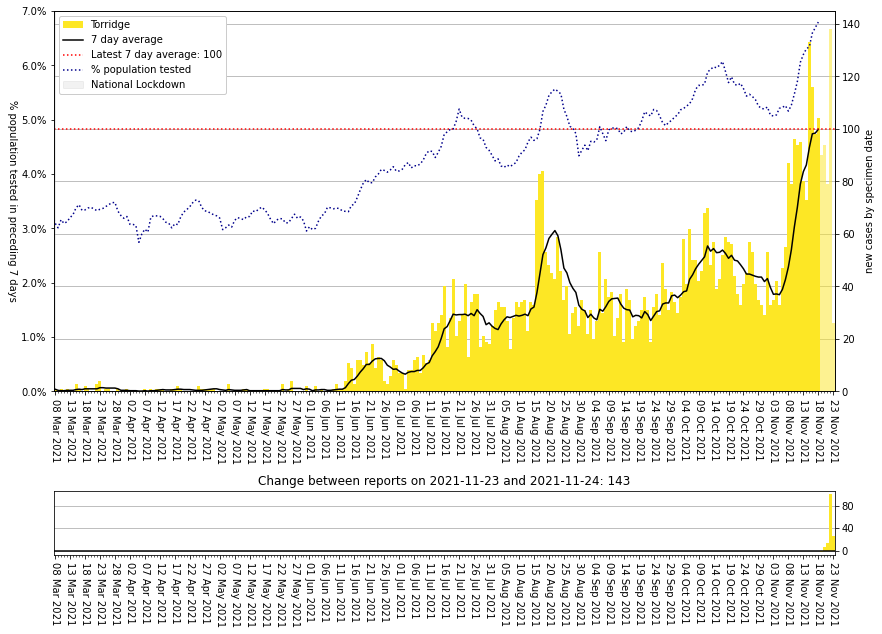

In [11]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [12]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                             
E08000025                           Birmingham          260.812600   
E06000052         Cornwall and Isles of Scilly          430.743509   
E06000054                            Wiltshire          485.776683   
E08000035                                Leeds          256.827618   
N09000003                              Belfast          583.916959   
E06000058  Bournemouth, Christchurch and Poole          495.028217   
E06000047                        County Durham          356.351892   
E06000059                               Dorset          482.948841   
E06000023                     Bristol, City of          332.342779   
E06000050            Cheshire West and Chester          438.684704   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
E08000025                  2978.0    2021-11-23  
E06000052                  2463.0    2021-11-23  
E06000054                  2429.0    2021-11-23  
E08000035                  2037.0    2021-11-23  
N09000003                  2006.0    2021-11-23  
E06000058                  1957.0    2021-11-23  
E06000047                  1889.0    2021-11-23  
E06000059                  1828.0    2021-11-23  
E06000023                  1540.0    2021-11-23  
E06000050                  1505.0    2021-11-23

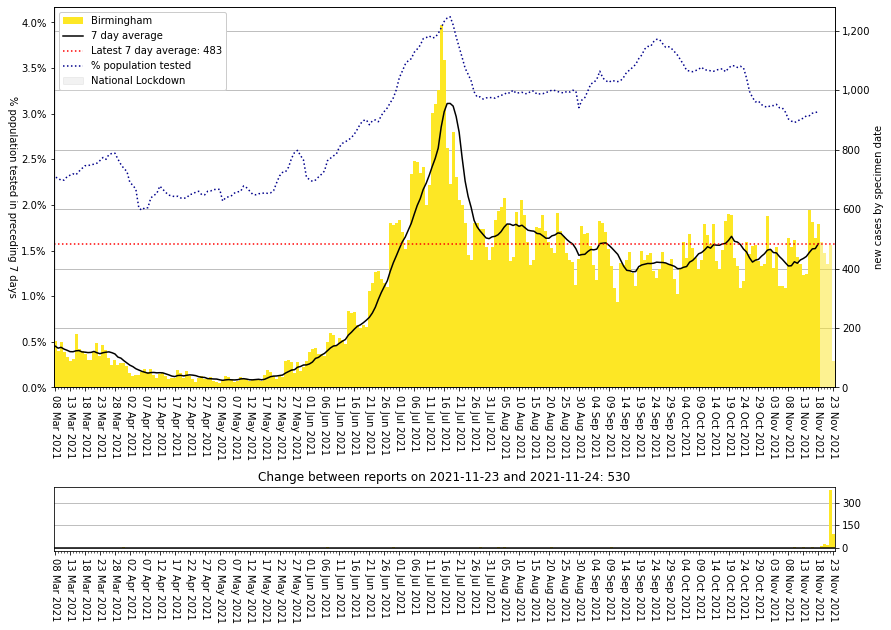

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

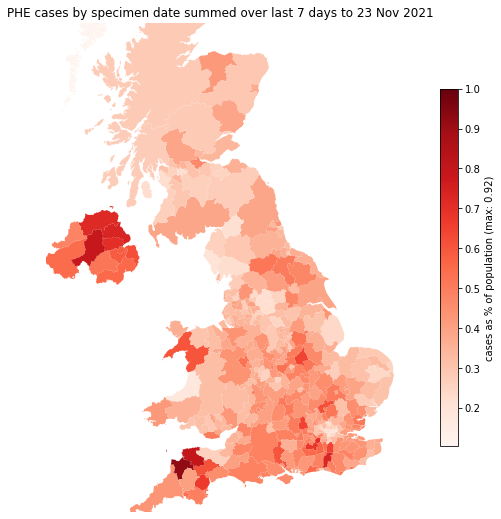

Loading BokehJS ...

In [14]:
summed_maps(for_date, vmax=1)

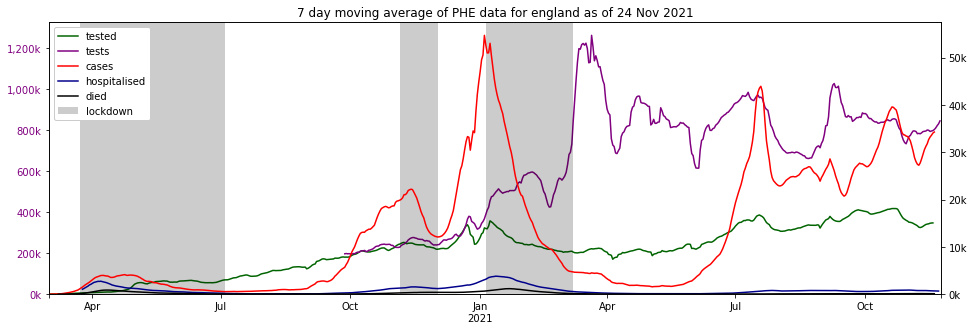

In [15]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

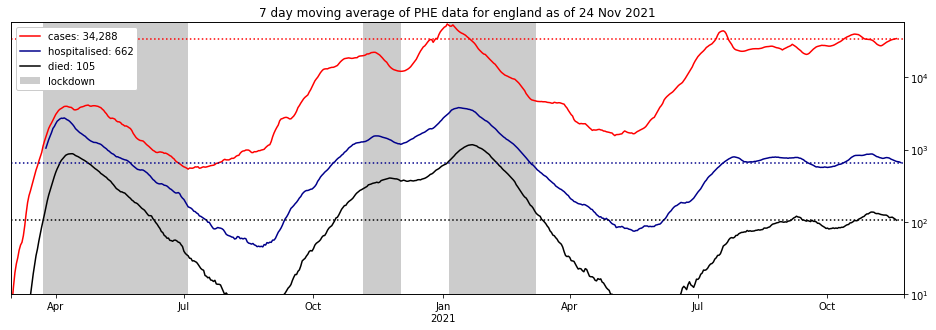

In [16]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

In [17]:
vaccination_changes()

areaName   areaCode        full         any    partial  population  \
0           England  E92000001  38744164.0  42661743.0  3917579.0    56286961   
1  Northern Ireland  N92000002   1263765.0   1359404.0    95639.0     1893667   
2          Scotland  S92000003   3941715.0   4341224.0   399509.0     5463300   
3             Wales  W92000004   2259175.0   2465183.0   206008.0     3152879   

    full_pct  partial_pct   none_pct  
0  68.833284     6.960012  24.206704  
1  66.736390     5.050466  28.213144  
2  72.148976     7.312595  20.538429  
3  71.654351     6.533965  21.811684

'partial: 50,827,554 (76.1%), full: 46,208,819'

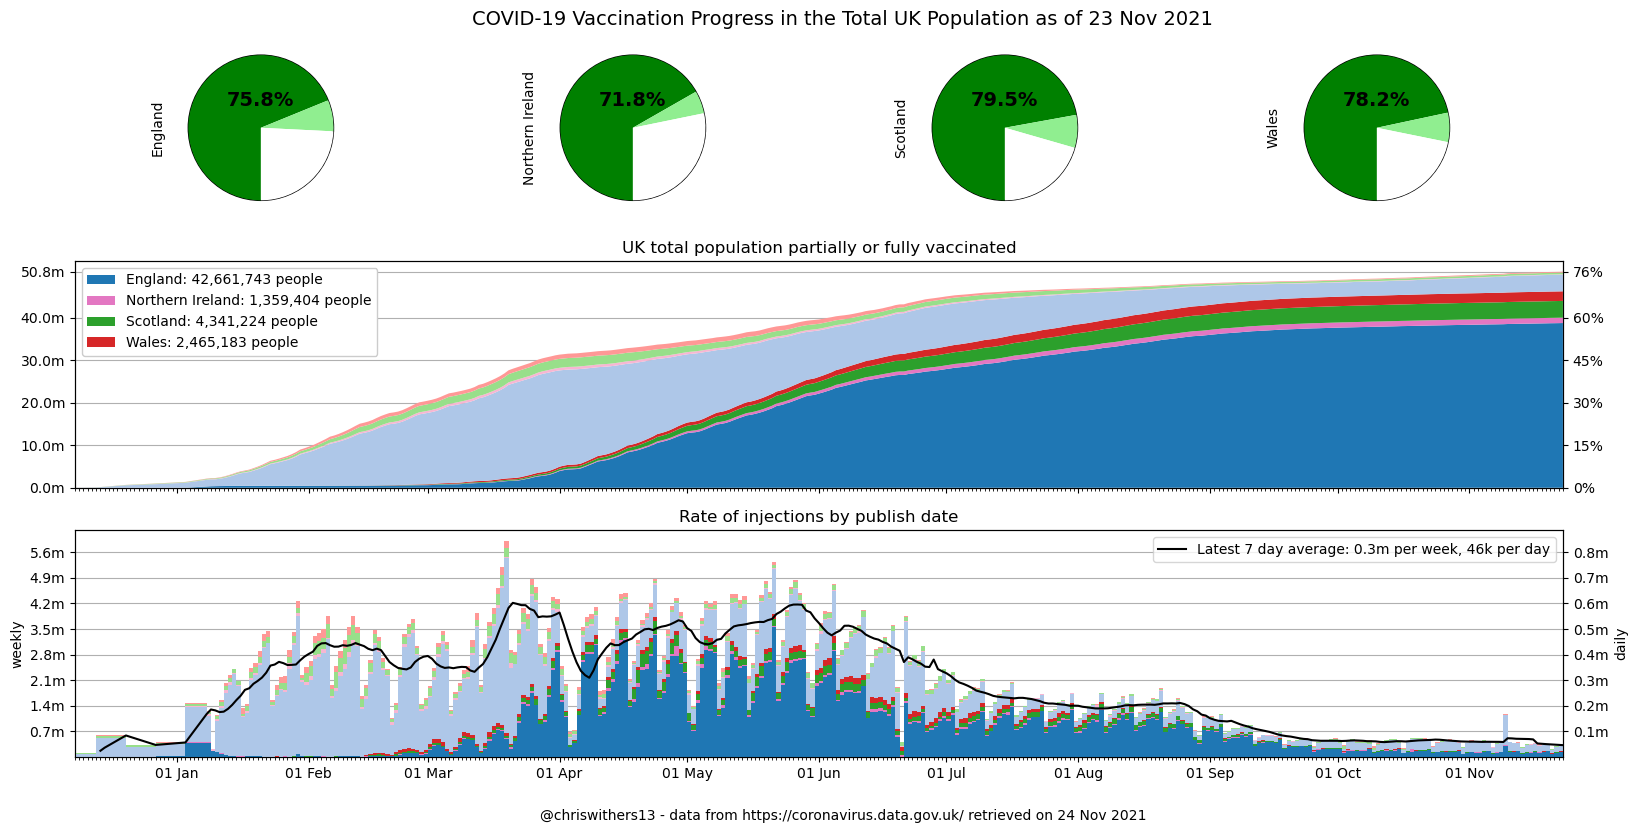

In [18]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")